In [1]:
import os
os.chdir('/home/cosysoft/Documents/autostat/autostat/')
os.getcwd()

'/home/cosysoft/Documents/autostat/autostat'

In [2]:
import pandas as pd

In [3]:
df = pd.read_excel('data/interim/pledges_ner.xls')

### Найдено брендов

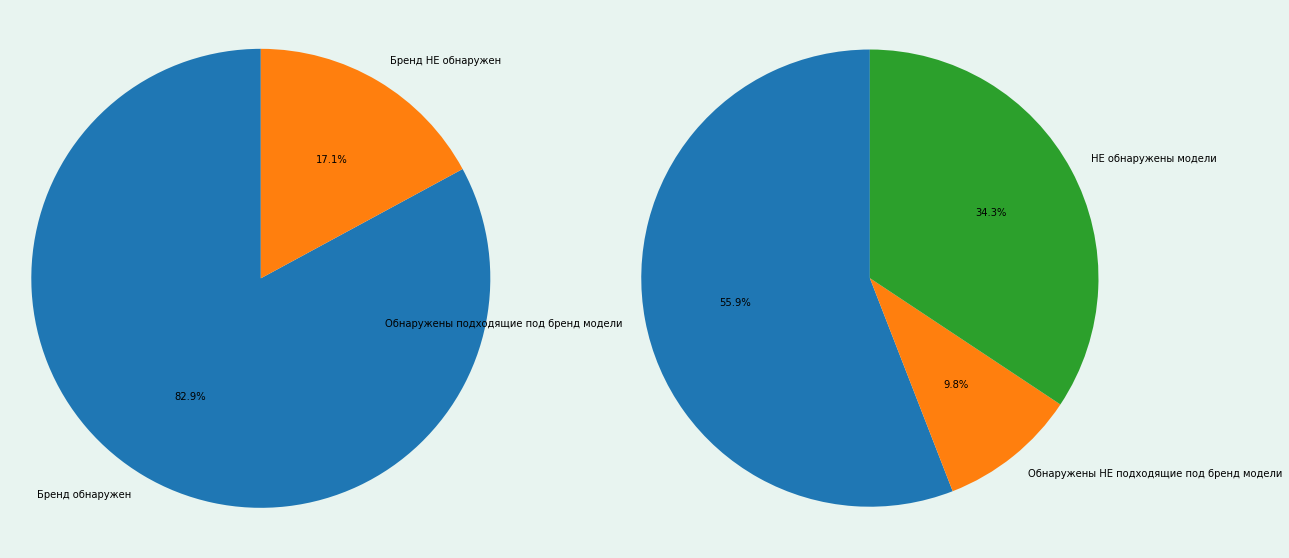

In [12]:
from src.visualisation.chart import show_2_pie, show_bar_model

show_2_pie(df)

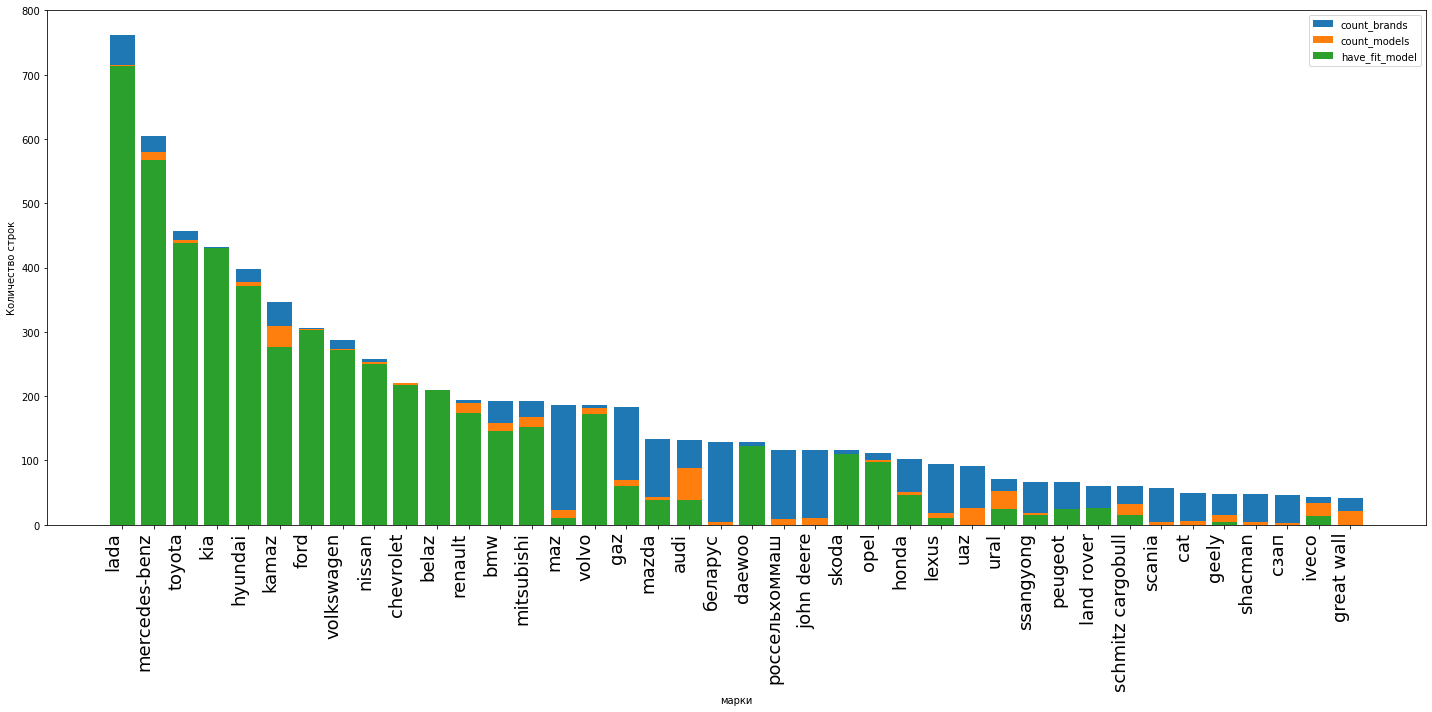

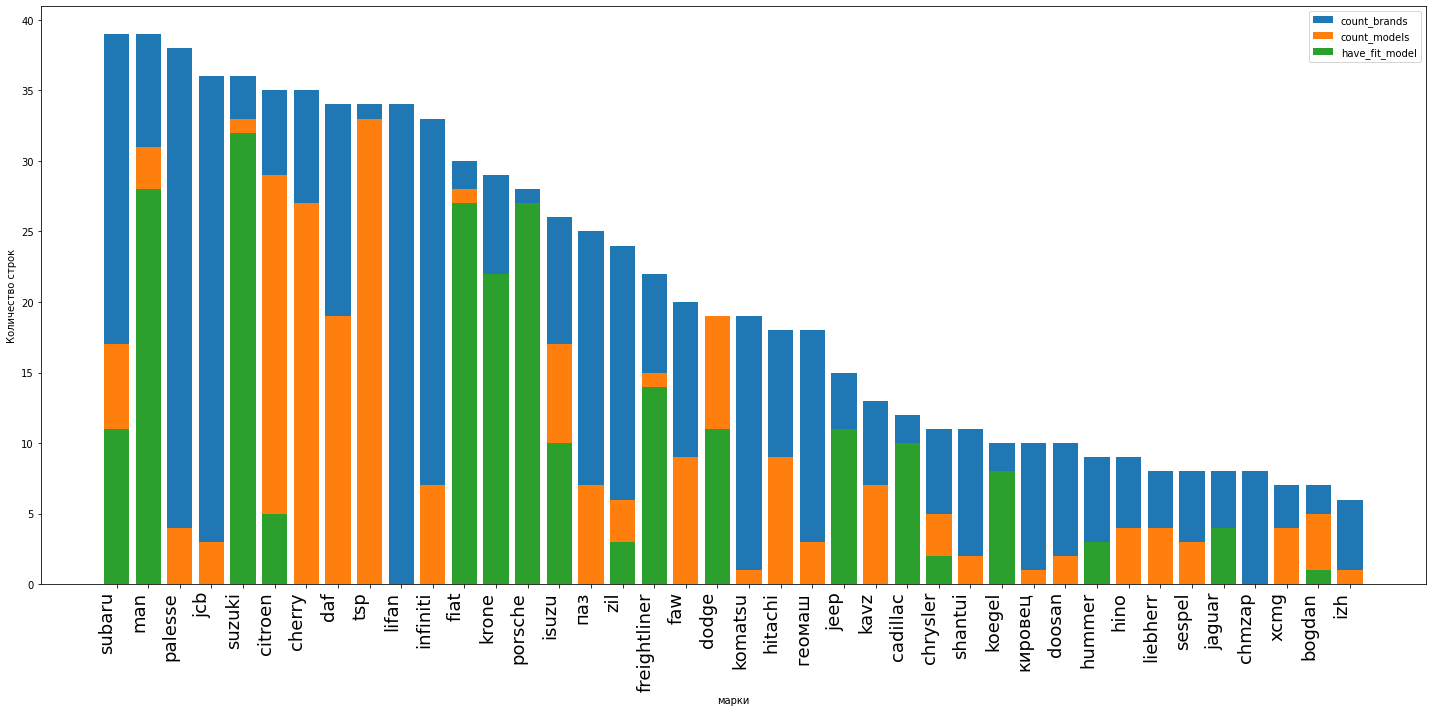

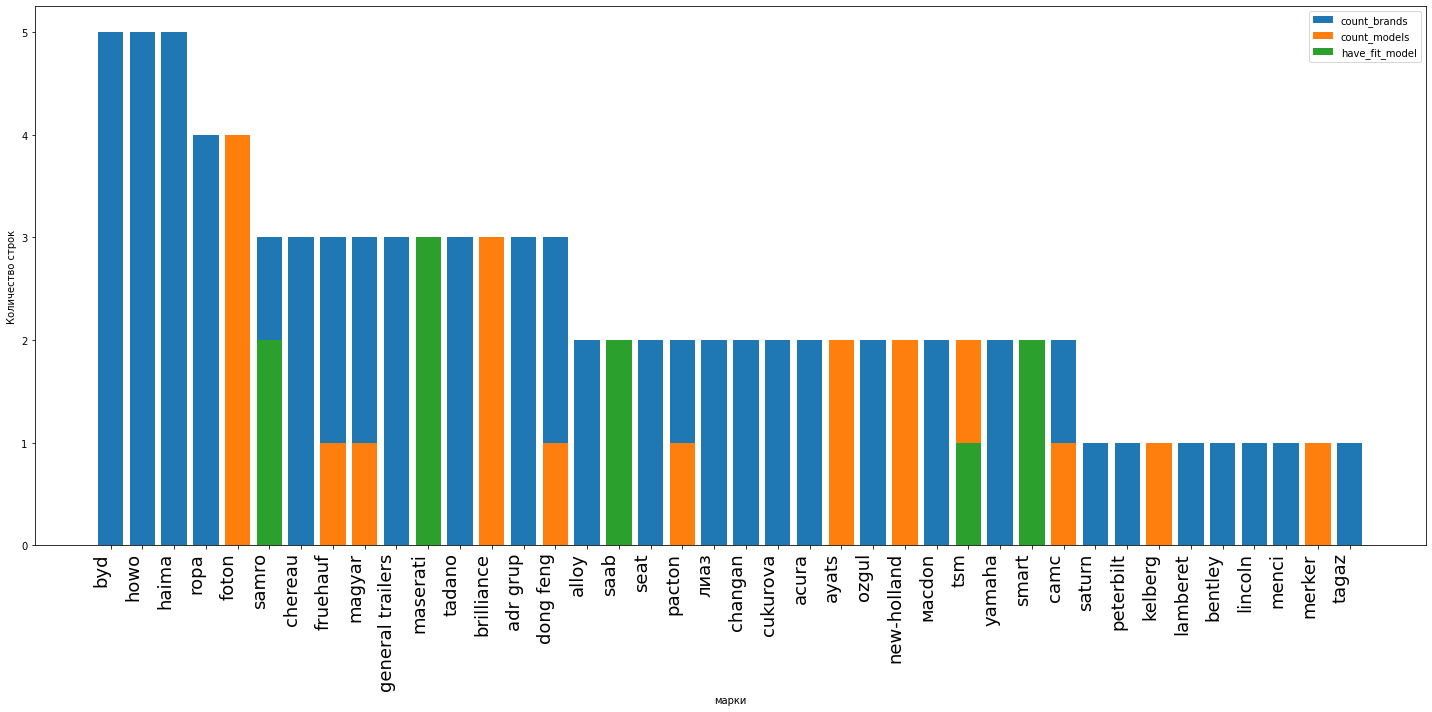

In [17]:
show_bar_model(df, 0, 40)
# show_bar_model(df, 40, 80)
# show_bar_model(df, 80, 120)

### Найдено годов выпуска

In [4]:
print("Из",df.shape[0], "строк в", df[df['years'].notna()].shape[0], "обнаружен год выпуска")

Из 10000 строк в 6790 обнаружен год выпуска


In [5]:
print("В",df[df['years'].notna()][df['count_years']>1].shape[0], "обнаружено более одного года выпуска.")

В 64 обнаружено более одного года выпуска.


/tmp/ipykernel_397133/307501026.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print("В",df[df['years'].notna()][df['count_years']>1].shape[0], "обнаружено более одного года выпуска.")


### Если не ясно что нашла модель

Вставляем текст в article и запускаем. Получим подсветку.

In [6]:
import ru_core_news_sm
from spacy import displacy
from src.models.NER.model import create_ner_model

colors = {"BRAND": "#aa9cfc", "MODEL": "#fc9ce7", "YEAR": "#9cfcb1"}
options = {"ents": ["BRAND", "MODEL", "YEAR"], "colors": colors}

nlp = create_ner_model("data/interim/rules/brands.jsonl", "data/interim/rules/brands")

article = 'Трактор с бульдозерным и рыхлительным оборудованием Б10М1111-ЕНгод выпуска - 2005заводской номер машины - 35470 двигатель № - 20128коробка передач № - 50073основной ведущий мост - 04.12-113 цвет - желтыйэмаль АС1247вид движителя - гусеничныймощность двигателя -кВт(л.с) - 125  (170) паспорт транспортного средства ВВ 322237 выдан 22.02.2005'

doc = nlp(article)

displacy.render(doc, style="ent",  options=options)